In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('Data.csv')

In [4]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.1,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.2,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.3,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.4,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.5,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['season'].unique()

array(['2016/17', '2016', '2017', '2017/18', '2018', '2018/19', '2019',
       '2019/20', '2020', '2020/21', '2005', '2004/05', '2005/06', '2006',
       '2006/07', '2007', '2007/08', '2008', '2009', '2008/09', '2009/10',
       '2010', '2010/11', '2011', '2011/12', '2012/13', '2012', '2013',
       '2013/14', '2014', '2014/15', '2015', '2015/16'], dtype=object)

In [6]:
data.innings.unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
data_df = data[(data.innings == 1) | (data.innings == 2)]

In [8]:
data_df['innings'].unique()

array([1, 2], dtype=int64)

# ADDITIONAL COLUMNS

1. total runs in each ball
2. is there a wicket fall in that ball

In [9]:
data_df['total_runs'] = data_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [10]:
data_df['isOut'] = data_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [11]:
data_df['isOut'].unique()

array([0, 1], dtype=int64)

# Choose Teams

In [12]:
t1 = 'India'
t2 = 'England'

In [13]:
data_df[(data_df.batting_team == t1) & (data_df.bowling_team == t2) & (data_df.innings == 1)].match_id.unique()

array([1034825, 1034827, 1034829, 1119544,  287873,  474476,  521217,
        533281,  565811], dtype=int64)

In [14]:
matchId=1034825

In [15]:
mdf = data_df[data_df.match_id == matchId]

In [16]:
mdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
3591,1034825,2016/17,2017-01-26,Green Park,1,0.1,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3592,1034825,2016/17,2017-01-26,Green Park,1,0.2,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3593,1034825,2016/17,2017-01-26,Green Park,1,0.3,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
3594,1034825,2016/17,2017-01-26,Green Park,1,0.4,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3595,1034825,2016/17,2017-01-26,Green Park,1,0.5,India,England,KL Rahul,V Kohli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [17]:
mdf.reset_index(inplace = True, drop = True)

In [18]:
df1 = mdf[mdf.innings == 1] 
df2 = mdf[mdf.innings == 2] 

In [73]:
df1

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1034825,2016/17,2017-01-26,Green Park,1,0.1,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1034825,2016/17,2017-01-26,Green Park,1,0.2,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1034825,2016/17,2017-01-26,Green Park,1,0.3,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
3,1034825,2016/17,2017-01-26,Green Park,1,0.4,India,England,V Kohli,KL Rahul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,1034825,2016/17,2017-01-26,Green Park,1,0.5,India,England,KL Rahul,V Kohli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1034825,2016/17,2017-01-26,Green Park,1,19.2,India,England,MS Dhoni,Parvez Rasool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
124,1034825,2016/17,2017-01-26,Green Park,1,19.3,India,England,MS Dhoni,Parvez Rasool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
125,1034825,2016/17,2017-01-26,Green Park,1,19.4,India,England,MS Dhoni,Parvez Rasool,...,NaN,NaN,NaN,NaN,run out,Parvez Rasool,NaN,NaN,0,1
126,1034825,2016/17,2017-01-26,Green Park,1,19.5,India,England,MS Dhoni,JJ Bumrah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


# Outcomes

In [19]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [20]:
data_df[data_df.batting_team == t1].total_runs.value_counts()

1    6892
0    5043
4    1736
2    1187
6     722
3      87
5      27
7       4
Name: total_runs, dtype: int64

In [21]:
data_df[data_df.batting_team == t1].isOut.sum()

682

In [22]:
t1_outcomes_count = data_df[data_df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = data_df[data_df.batting_team == t2].total_runs.value_counts()

In [23]:
t1_outcomes_count

1    6892
0    5043
4    1736
2    1187
6     722
3      87
5      27
7       4
Name: total_runs, dtype: int64

In [24]:
t1_outs = data_df[data_df.batting_team == t1].isOut.sum()
t2_outs = data_df[data_df.batting_team == t2].isOut.sum()

In [25]:
t1_outcomes = []
t2_outcomes = []

for outcome in outcomes:
    if outcome != 'w':
        t1_outcomes.append(t1_outcomes_count[outcome])
        t2_outcomes.append(t2_outcomes_count[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)

In [26]:
t1_outcomes, t2_outcomes

([5043, 6892, 1187, 87, 1736, 722, 682],
 [4889, 6021, 1151, 90, 1719, 670, 781])

In [27]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [28]:
t1_pb_outcomes

[0.30845923298061045,
 0.42155483515811365,
 0.07260382898036577,
 0.00532142638693498,
 0.10618386445654168,
 0.04416172242950639,
 0.04171508960792709]

In [29]:
t1_pb_ls = np.cumsum(t1_pb_outcomes)
t2_pb_ls = np.cumsum(t2_pb_outcomes)
t1_pb_ls, t2_pb_ls

(array([0.30845923, 0.73001407, 0.8026179 , 0.80793932, 0.91412319,
        0.95828491, 1.        ]),
 array([0.3191045 , 0.71209451, 0.78722016, 0.79309445, 0.90529339,
        0.94902422, 1.        ]))

# Function: 1st Innings runs prediction

In [30]:
def innings_1_runs(curr_score, curr_wickets, curr_overs):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    leftover_balls = 120 - (over_no*6 + ball_no)
    i1p_0 = t1_pb_ls[0]
    i1p_1 = t1_pb_ls[1]
    i1p_2 = t1_pb_ls[2]
    i1p_3 = t1_pb_ls[3]
    i1p_4 = t1_pb_ls[4]
    i1p_6 = t1_pb_ls[5]
    i1p_w = t1_pb_ls[6]
    
    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1   

            if pred_wks == 10:
                break
                
    return pred_runs

In [31]:
# innings_1_runs(curr_score, curr_wickets, curr_overs)
innings_1_runs(140, 2, 15.0)

167

# Function: 2nd Innings runs prediction

In [32]:
def innings_2_runs(curr_score, curr_wickets, curr_overs, target):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)

    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1   

            if pred_wks == 10:
                break
        if pred_runs > target:
            break
                
    return pred_runs

In [33]:
# innings_2_runs(curr_score, curr_wickets, curr_overs, target)
innings_2_runs(140, 4, 19.0, 150)

151

In [34]:
df_ing1 = mdf[mdf.innings == 1] 
df_ing2 = mdf[mdf.innings == 2] 

In [54]:
df_ing2=df_ing2.reset_index()

In [55]:
df_ing1.shape

(128, 24)

In [36]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_wickets += df_ing1.isOut[i]
    curr_overs = df_ing1.ball[i]
    
    prediction = innings_1_runs(curr_score, curr_wickets, curr_overs)
    ing1_runs_pred.append(prediction)

In [56]:
sum(df_ing1.total_runs)

147

In [57]:
actual_score = sum(df_ing1.total_runs)

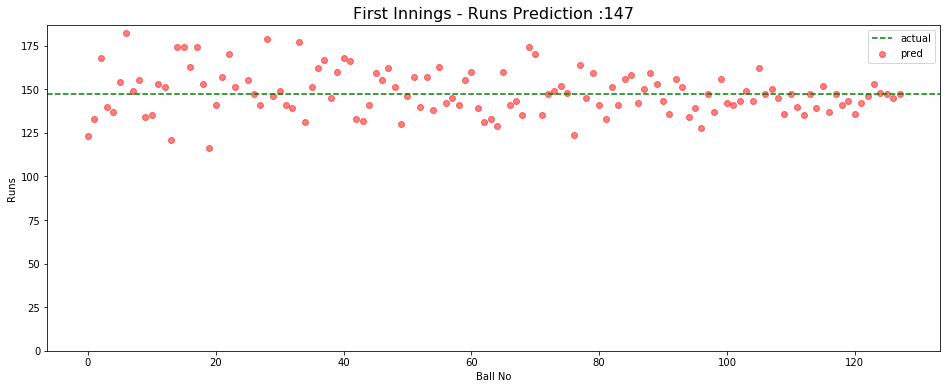

In [58]:
x_values = [i for i in range(len(df_ing1))]
y_values = ing1_runs_pred

plt.figure(figsize = (16, 6))
plt.scatter(x_values, y_values, color = 'r', alpha = 0.5, label = 'pred')
plt.axhline(actual_score, ls = '--', color = 'g', label = 'actual')
plt.ylim(0, actual_score + 40 )
plt.title('First Innings - Runs Prediction :'+ str(actual_score), fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [59]:
error_ing1_ls = [abs(i - actual_score) for i in ing1_runs_pred]
np.mean(error_ing1_ls)

10.1953125

# Runs prediction: 2nd Innings

In [61]:
# define target as ing 1 actual score
ing1_actual_score = actual_score 
target = ing1_actual_score

curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing2_runs_pred = []
for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_score, curr_wickets, curr_overs, target)
    ing2_runs_pred.append(prediction)

In [62]:
ing2_actual_score = sum(df_ing2.total_runs)

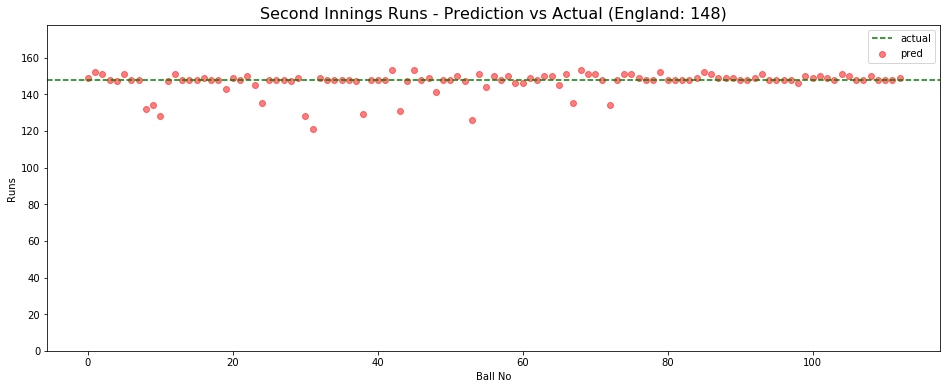

In [63]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [64]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

2.9026548672566372

# Win Percentrage 1 innings

In [66]:
# initialize win/tie/lose - w.r.t chasing team
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # 100 iterations: (ex: 43% wins, 17% tie, 40% lose)
    for j in range(100):   
        ing1_runs_prediction = innings_1_runs(ing1_curr_score, ing1_curr_wickets, ing1_curr_overs)
        target = ing1_runs_prediction
        
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

# Win predictions: 2nd Innings

In [69]:
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0
target = ing1_actual_score

# each ball
for i in range(len(df_ing2)):
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # 100 iterations: (ex: 43% wins, 17% tie, 40% lose)
    for j in range(100):   
                
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [74]:
len(win_count_ls)

241

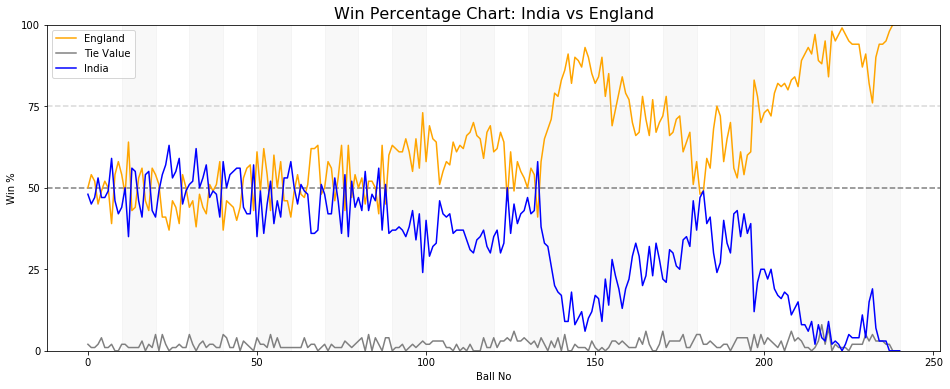

In [72]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
#plt.axhline(y = 45, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()